<a href="https://colab.research.google.com/github/AnantasiiaAleks/A-B_tests/blob/main/Aleksandrovskaya_HW_promezhut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Ускорение тестирования</b></h3>


# Выводы

Представленный датасет заполнен значениями metrica, распределенными по группам history, A и В, а также по подгруппам strata. Общее количество значений - 50_000. Распределение Неравномерное, объемы выборок разные. Причем группа history - самая маленькая, чуть больше 7_000 значений, тогда как группы А и В - свыше 21_000.  
Задание предполагает обработку данных в датасете и последующий анализ, имеются ли статистически значимые различия в группах history, A и В по признаку metrica.

Гипотезы:  
Н0 - статистически значимые различия в выборках отсутствуют.  
Н1 - статистически значимая разница в группах обнаружена.

### До преобразования

Для чистоты анализа изначально был проведен разведочный анализ данных:  
Проведены тесты Шапиро-Уилка для выявления нормального распределения метрики по исследуемым группам. Однако поскольку данных в группах слишком много (более 5_000), тест может быть недостаточно точным. Проведенная визуализация (QQ-график) подтвердила результаты теста Шапиро-Уилка о ненормальном распределении. Поэтому методом анализа межгрупповых различий был выбран тест Крускала-Уоллиса.  
p_value = 0.0806530030261136 - больше установленного значения уровня значимости 0.05, из чего мы можем следать вывод об отсутствии статистически значимых различиях между группами (не отвергаем Н0).  
Выполненная визуализация указывает на большое количество выбросов в каждой группе. Вероятно, именно из-за них невозможно провести параметрические тесты. Однако можно подтвердить результаты теста Крускала-Уоллиса об "одинаковости" групп: Межквартильный размах, медианы, значения min и max у каждой группы находится примерно на одном уровне.

### Bootstrapping

Бутстрэппинг - это метод, основанный на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки. Обычно количество псевдослучайных выборок варьируется от 500 до 10_000. Для своего анализа я взяла значение в 5_000 выборок. Размер каждой выборки равен размерам исследуемых групп.  
Далее из каждой сгненерированной выборки были взяты средние значения и из них составлены массивы для оценки статистической значимости различий. Тест Шапиро-Уилка показал нормальное распределение, визуализация методом QQ-графика подтвердила. Поскольку размеры тестовых выборок одинаковые (по 5_000 значений в каждой), методом оценки был выборан дисперсионный анализ с использованием критерия Фишера.  
p-value, близкий к значению 0.0 указал на наличие статистически значимых различий между группами (отвергаем Н0). Проведенный post hoc тест (Тьюки) подтверждает различия между каждой парой групп.  
С целью уточнения результатов построены доверительные интервалы каждой исследуемой группы и выволнена визуализация.  
С результатами и выводами можно ознакомиться в конце анализа.

### Стратификация

Стратификация — это разделение полученных данных на отдельные группы (слои, страты) в зависимости от выбранного стратифицирующего фактора. Цель стратификации - уменьшить разброс данных с целью повысить точность оценки.  
В качестве стратифицирующего фактора был выбран признак strata. По каждой группе и страте вычислены средние значения метрик и составлены массивы для оценки статистически значимой разницы групп. Оценка нормальности распределения и равенства дисперсий позволила провести дисперсионный анализ. Результаты ANOVA-анализа показали отсутствие статистически значимых различий между группами (Н0 не отвергаем). Выполненная визуализация демонстрирует отсутствие выбросов, а также визуальное сходство положений элементов боксплота.

### CUPED

CUPED (Controlled-experiment Using Pre-Experiment Data) — статистическая техника, которая используется для повышения эффективности A/B-тестирования. Суть метода — использование некоторой ковариаты, чаще - данных, собранных до начала эксперимента, чтобы скорректировать результаты теста и уменьшить дисперсию. Это помогает получить более точные и надёжные выводы. Поскольку в нашем исследовании "исторических" данных нет, в качестве ковариаты взят признак strata, на основе которого в дата-сет были добавлены усредненные по strata данные. Полученная централизованная метрика прекрасно коррелирует с основной метрикой (значение корреляции свыше 0.9).
Оценка нормальности распределения и построенные QQ-графики демонстрируют невозможность применения параметрических тестов, поэтому оценка разницы между группами была проведена с помощью теста Крускала-Уоллиса, который показал отсутствие статистически значимых различий (Н0 не отвергаем).
В выволненной визуализации схожесть cuped-метрик по группам также видна.
В связи с тем, что на боксплотах отсутствуют выбросы, которые приводят к некорректности параметрических тестов, было принято решение дополнительно провести тест Фишера, который также показал отсутствие значимых различий между группами.

### Анализ дисперсий выборок

Дисперсия влияет на результаты A/B-тестов, увеличивая вариативность данных. Чем больше данных получено в тесте, тем больше в выборке разнообразных случаев и выбросов. Это приводит к тому, что результаты каждого варианта могут отклоняться друг от друга и от среднего значения. Поэтому можно следать вывод, что чем меньше дисперсия выборки, тем точнее будет анализ.

Дисперсии до обработки датасета:  
- Группа history: 1179.8911066373037  
- Группа A: 1184.441556272474  
- Группа B: 1165.603480776887  
Наблюдается высокий уровень дисперсии. На графиках видно большое количество выбросов. Параметрические тесты (более эффективные и быстрые) неприменимы.

Дисперсии бутстрэп-выборок:  
- Группа history: 0.16592237399102797
- Группа A: 0.05477322912912082
- Группа B: 0.0544531441481643  
Дисперсии крайне малы, данные бутстрэп-выборок однородны, поэтому даже незначительные различия между группами history, A и В становятся заметными. Стало доступно применение параметрических тестов, которые являются более надежными по сранению с непараметрическими.

Дисперсии стратифицированных выборок:  
- Группа history: 224.8355937645508  
- Группа A: 215.516960011768  
- Группа B: 202.9036515310619  
Значительное снижение дисперсии по сравнению с датасетом до обработки. Интерпретация результатов становится более четкой. В данных отсутствуют выбросы, распределение метрики стало нормальным. Доступны параметрические тесты.

Дисперсии cuped-выборок:  
- Группа history: 203.3364661493701  
- Группа А: 209.41926940273643  
- Группа В: 209.79712678310634  
Дисперсия сравнима с дисперсией после стратификации датасета.


Наиболее надежным способом обработки датасета можно считать бутстрэп, так как он существенно снизил изменчивость данных и обеспечил максимальную однородность в группах. Важно отметить, что дисперсионный анализ, проведенный после бутстрэппирования датасета, показал наличие статистических значимых различий между группами, тогда как остальные методики демонстрирвали схожесть групп.

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set_theme()

## Импорт данных

In [ ]:
data_path = "https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/SkillBox/ab_speedup.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (50000, 2)


,group,metrica
strata,,
11,history,42.631346
6,history,14.844453
4,history,2.362768
37,history,79.494017
18,history,-22.627788
34,history,28.679378


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой результаты некоторого А/B-Теста.

* `strata` - Некоторая информация по страту (группа), к которой относится пользователь.
* `group` - Группа эксперимента - тестовая, контрольная или прошлая история.
* `metrica` - Целевая метрика
    
</div>

In [ ]:
data.describe()

,metrica
count,50000.000000
mean,35.654712
std,34.291229
min,-147.125702
25%,13.154502
50%,28.380041
75%,53.585312
max,230.607984


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 11 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   group    50000 non-null  object 
 1   metrica  50000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
data['group'].unique()

array(['history', 'B', 'A'], dtype=object)

In [ ]:
alpha = 0.05

In [ ]:
h = data[data['group'] == 'history']['metrica']
a = data[data['group'] == 'A']['metrica']
b = data[data['group'] == 'B']['metrica']

In [ ]:
# Проверяем на нормальность
sps.shapiro(h)                    # ShapiroResult(statistic=0.9465837128777441, pvalue=5.07368270821608e-45)
sps.shapiro(a)                    # ShapiroResult(statistic=0.9488991260247115, pvalue=4.404620184617128e-64)
sps.shapiro(b)                    # ShapiroResult(statistic=0.9502831641546328, pvalue=1.550041078497369e-63)

# все три выборки не имеют нормального распределения (pvalue < alpha=0.05)

C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7143.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21427.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21430.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9502831641546328, pvalue=1.550041078497369e-63)

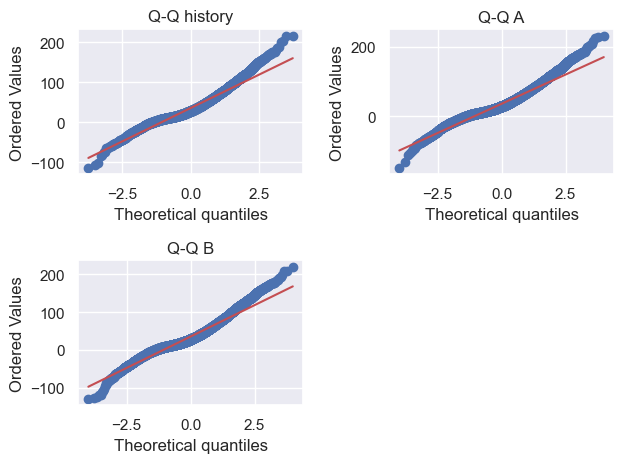

In [ ]:
# Поскольку значений в выборках слишком много, воспользуемся визуальными методами, чтобы подтвердить тест Шапиро-Уилка
cols = {'history':h, 'A':a, 'B':b}
for idx, (name, col) in enumerate(cols.items()):
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name}')

plt.tight_layout()
plt.show()

# Отсутствие нормального распределения подтверждено

In [ ]:
# Проверяем различия между группами с помощью теста Крускала-Уоллиса

kr_statistic, kr_p_value = sps.kruskal(h, a, b)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние отличаются')

# Статистик 5.035198479628889, p_value 0.0806530030261136
# Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено
# Время выполнения:  0.030722618103027344

Статистик 5.035198479628889, p_value 0.0806530030261136
Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено


In [ ]:
print(f'Дисперсия history: {np.var(h)}')
print(f'Дисперсия A: {np.var(a)}')
print(f'Дисперсия B: {np.var(b)}')

Дисперсия history: 1179.8911066373037
Дисперсия A: 1184.441556272474
Дисперсия B: 1165.603480776887


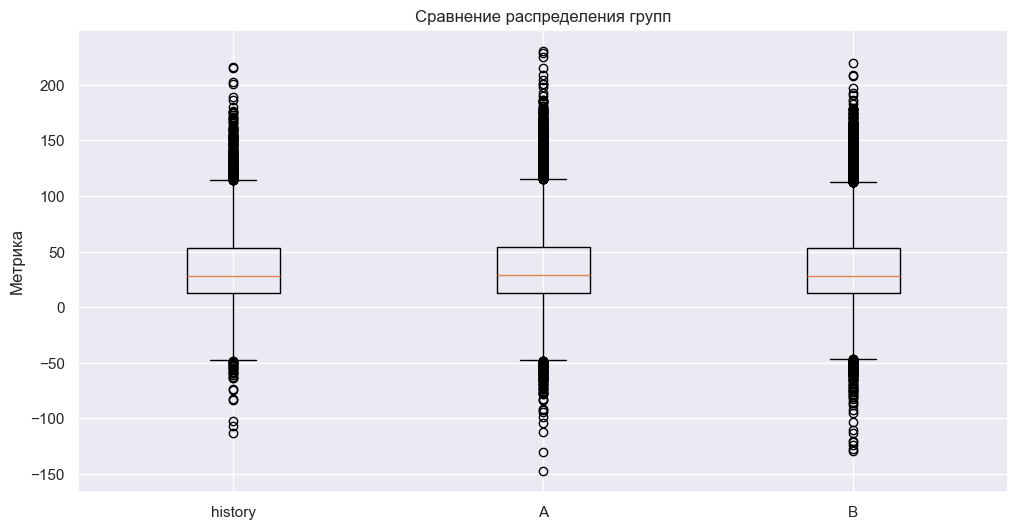

In [ ]:
plt.figure(figsize=(12, 6))
groups_graph = [h, a, b]
plt.boxplot(groups_graph, tick_labels=['history', 'A', 'B'])
plt.title('Сравнение распределения групп')
plt.ylabel('Метрика')
plt.show()

<div class="alert alert-info">

<b>Задание:</b>    
    
Найти различие между группами, увеличив чувствительность тестов тремя способами поочередно:
* Бутстрап
* Стратификация
* CUPED
    
Вспомогательная статья Валерия Бабушкина про стратификацию и CUPED:

* habr.com/ru/company/yandex/blog/497804/

## Mетод бутстрэп

In [ ]:
h = data[data['group'] == 'history']['metrica']
a = data[data['group'] == 'A']['metrica']
b = data[data['group'] == 'B']['metrica']

len(h), len(a), len(b)
# (7143, 21427, 21430)

(7143, 21427, 21430)

In [ ]:
# Количество бутстрап-выборок
n_iterations = 5000
# Размер каждой бутстрап-выборки
sample_size_h = len(h)
sample_size_a = len(a)
sample_size_b = len(b)

# Функция для бутстрапирования
def bootstrap_sample(data, n_iterations):
    return [np.random.choice(data, size=len(data), replace=True) for i in tqdm(range(n_iterations))]

# Генерация бутстрап-выборок
bootstrap_h = bootstrap_sample(h, n_iterations)
bootstrap_a = bootstrap_sample(a, n_iterations)
bootstrap_b = bootstrap_sample(b, n_iterations)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 962.10it/s]


In [ ]:
def get_boot_means(boot_lists):
    boot_means = []
    for boot_list in boot_lists:
        boot_means.append(boot_list.mean())
    return boot_means

h_boot_means = get_boot_means(bootstrap_h)
a_boot_means = get_boot_means(bootstrap_a)
b_boot_means = get_boot_means(bootstrap_b)

In [ ]:
print(sps.shapiro(h_boot_means))
print(sps.shapiro(a_boot_means))
print(sps.shapiro(b_boot_means))

ShapiroResult(statistic=0.9997149329862959, pvalue=0.7509979482873954)
ShapiroResult(statistic=0.9997486006868582, pvalue=0.8431300356605241)
ShapiroResult(statistic=0.9996311093616277, pvalue=0.5005042155982256)


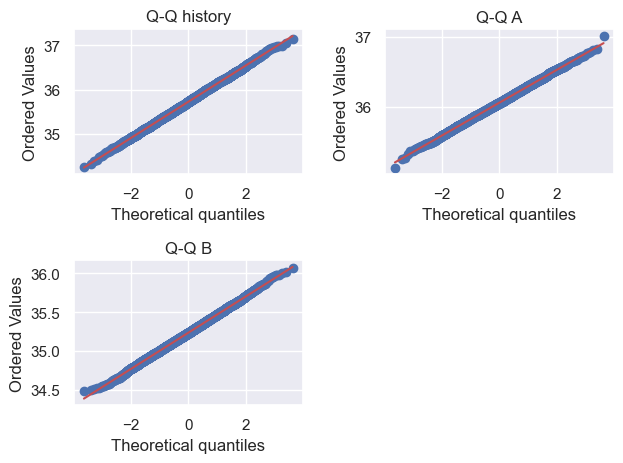

In [ ]:
cols = {'history':h_boot_means, 'A':a_boot_means, 'B':b_boot_means}
for idx, (name, col) in enumerate(cols.items()):
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name}')

plt.tight_layout()
plt.show()

# Нормальное распределение подтверждено

In [ ]:
print(len(h_boot_means), len(a_boot_means), len(b_boot_means))
# (5000, 5000, 5000)

h_mean_mean = np.mean(h_boot_means)             # 35.72384823970872
print(h_mean_mean)
a_mean_mean = np.mean(a_boot_means)             # 36.059532465446864
print(a_mean_mean)
b_mean_mean = np.mean(b_boot_means)             # 35.232295580207214
print(b_mean_mean)

print(f'Дисперсия бутстрэп-history: {np.var(h_boot_means)}')
print(f'Дисперсия бутстрэп-A: {np.var(a_boot_means)}')
print(f'Дисперсия бутстрэп-B: {np.var(b_boot_means)}')

5000 5000 5000
35.72384823970872
36.059532465446864
35.232295580207214
Дисперсия бутстрэп-history: 0.16592237399102797
Дисперсия бутстрэп-A: 0.05477322912912082
Дисперсия бутстрэп-B: 0.0544531441481643


In [ ]:
# Распределение нормальное, размеры выборок одинаковые, однородность не имеет значения, можем воспользоваться критерием Фишера
print(sps.f_oneway(h_boot_means, a_boot_means, b_boot_means))
# F_onewayResult(statistic=9435.087978109508, pvalue=0.0)

F_onewayResult(statistic=9435.087978109508, pvalue=0.0)


In [ ]:
# Post hoc test Tukey

df = pd.DataFrame({
    'means': np.concatenate((h_boot_means, a_boot_means, b_boot_means)),
    'group': np.repeat(['history', 'A', 'B'], repeats=len(h_boot_means))
})
tukey = pairwise_tukeyhsd(df['means'],
                          df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
     A       B  -0.8272   0.0 -0.8414  -0.813   True
     A history  -0.3357   0.0 -0.3499 -0.3215   True
     B history   0.4916   0.0  0.4774  0.5058   True
----------------------------------------------------


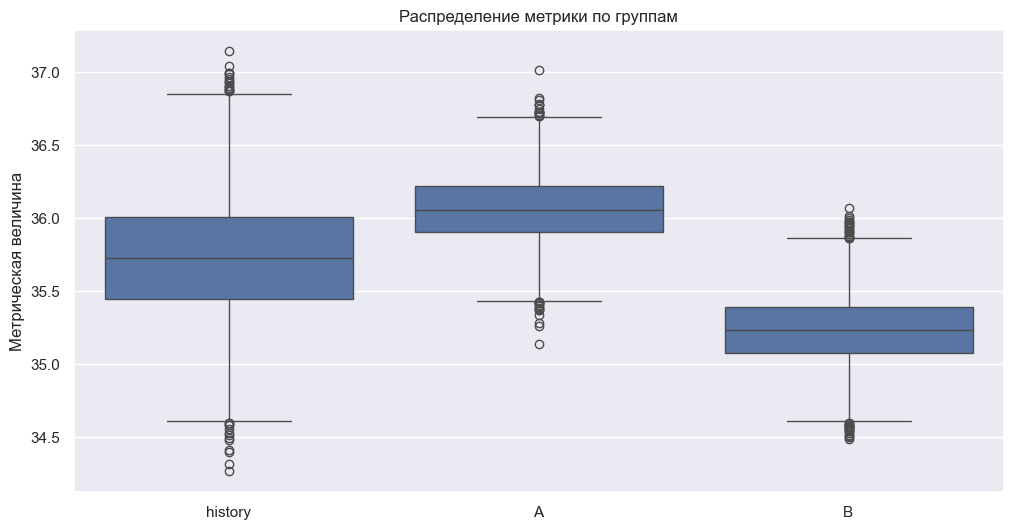

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='group', y='means', data=df)
plt.title('Распределение метрики по группам')
plt.xlabel('')
plt.ylabel('Метрическая величина')
plt.show()

In [ ]:
def conf_interval(data, alpha=0.95):
    lower = np.percentile(data, (1 - alpha) / 2 * 100)
    upper = np.percentile(data, (1 + alpha) / 2 * 100)
    return lower, upper

# Рассчитываем доверительные интервалы для каждой группы
ci_h = conf_interval(h_boot_means)
ci_a = conf_interval(a_boot_means)
ci_b = conf_interval(b_boot_means)

print(f'Доверительный интервал для группы history: {ci_h}')
print(f'Доверительный интервал для группы A: {ci_a}')
print(f'Доверительный интервал для группы B: {ci_b}')

Доверительный интервал для группы history: (34.933526917208084, 36.51181562189512)
Доверительный интервал для группы A: (35.60101388747343, 36.52009274968268)
Доверительный интервал для группы B: (34.77853503022187, 35.692169653783665)


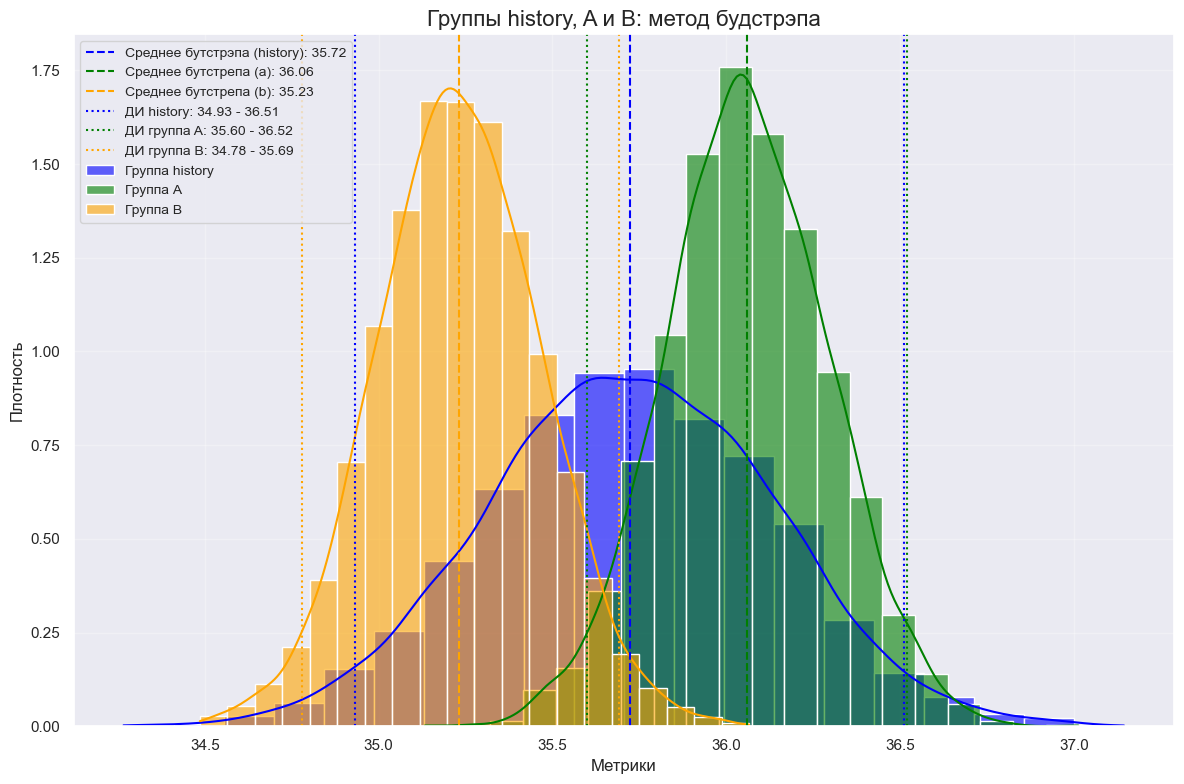

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(h_boot_means, bins=20, kde=True, color="blue", label="Группа history", stat="density", alpha=0.6)
sns.histplot(a_boot_means, bins=20, kde=True, color="green", label="Группа А", stat="density", alpha=0.6)
sns.histplot(b_boot_means, bins=20, kde=True, color="orange", label="Группа B", stat="density", alpha=0.6)

# Добавляем вертикальные линии для средних значений
plt.axvline(h_mean_mean, color="blue", linestyle="--", label=f'Среднее бутстрэпа (history): {h_mean_mean:.2f}')
plt.axvline(a_mean_mean, color="green", linestyle="--", label=f'Среднее бутстрепа (a): {a_mean_mean:.2f}')
plt.axvline(b_mean_mean, color="orange", linestyle="--", label=f'Среднее бутстрепа (b): {b_mean_mean:.2f}')

# Доверительные интервалы
plt.axvline(ci_h[0], color="blue", linestyle=":", label=f'ДИ history: {ci_h[0]:.2f} - {ci_h[1]:.2f}')
plt.axvline(ci_h[1], color="blue", linestyle=":")
plt.axvline(ci_a[0], color="green", linestyle=":", label=f'ДИ группа A: {ci_a[0]:.2f} - {ci_a[1]:.2f}')
plt.axvline(ci_a[1], color="green", linestyle=":")
plt.axvline(ci_b[0], color="orange", linestyle=":", label=f'ДИ группа B: {ci_b[0]:.2f} - {ci_b[1]:.2f}')
plt.axvline(ci_b[1], color="orange", linestyle=":")

# Оформление графика
plt.title("Группы history, A и В: метод будстрэпа", fontsize=16)
plt.xlabel("Метрики", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Интерпретация

Выборки сформированы бутстрэпированием. Был проведен ANOVA-анализ.
С целью более наглядной оценки визуализировали данные.
1) Средние значения:
   - Группа "А" имеет более высокое среднее значение метрики (36.06), группа "В" имеет наименьшее среднее значение метрики (35.23), что говорит о необходимости каких-либо улучшений метрики для группы "В".
   - Показатель группы "history" имеет среднее значение (35.73), она занимает промежуточное положение.
2) ANOVA-анализ и тест Тьюки:
   - Результат ANOVA (p_value < 0.05) указывает на наличие статистических значимых различиях между группами. Тест Тьюки указал, что различия наблюдаются между всеми группами.
3) Доверительные интервалы:
   - Группа 'history': ДИ от 34.96 до 36.51 (с 95%-вероятностью истинное значение для этой группы лежит в этом диапазоне).
   - Группа 'A': ДИ от 35.60 до 36.51. Он частично перекрывается с интервалом 'history', что может указывать на схожесть этих групп.
   - Группа 'B': ДИ от 34.79 до 35.68. Этот интервал не перекрывается с интервалами 'history' и 'A', что может свидетельствовать о значительных различиях между группой 'B' и остальными.
4) Выводы:
   - Группы 'A' и 'history' могут быть схожи по своим показателям, так как их доверительные интервалы пересекаются.
   - Группа 'B' выделяется, поскольку её значения значительно ниже и не пересекаются с другими группами.
   - Группа "A" превосходит другие группы по средним значениям.
   - Группа "B" требует внимания, так как ее показатели ниже, что может вызвать необходимость улучшений.
   - При это на графике видно, что показатели плотности значений группы "history" значительно ниже групп "А" и "В", а сама гистограмма и ДИ значительно шире, чем гистограммы и ДИ групп "А" и "В", что говорит о том, что оценка может быть менее точна, что для групп "А" и "В".

## Метод стратификации

In [ ]:
print(data.columns)

Index(['group', 'metrica'], dtype='object')


In [ ]:
print(data.index)

Index([11,  6,  4, 37, 18, 34,  9, 16, 43, 15,
       ...
       36, 14, 29,  9, 33, 47, 44, 49, 18, 41],
      dtype='int64', name='strata', length=50000)


In [ ]:
# сбросим индексы, чтобы колонка strata стала "активной"
data.reset_index(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   strata   50000 non-null  int64  
 1   group    50000 non-null  object 
 2   metrica  50000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# Посмотрим уникальные страты
data['strata'].unique()

array([11,  6,  4, 37, 18, 34,  9, 16, 43, 15, 20, 25,  0, 45, 23, 35, 21,
       46, 22, 17,  3, 41, 44, 12, 13, 24,  1, 26,  7, 30, 27,  2,  8, 40,
       33, 10, 36, 31, 32, 39, 19,  5, 28, 29, 38, 47, 42, 14, 49, 48],
      dtype=int64)

In [ ]:
# сформируем списки групп history, a и b внутри каждой страты
unique_strata = data['strata'].unique()

means_h = []
means_a = []
means_b = []

for strata in unique_strata:
    # Фильтруем данные по текущей страте
    stratum_data = data[data['strata'] == strata]

    strata_h = stratum_data[stratum_data['group'] == 'history']['metrica']
    means_h.append(strata_h.mean())
    strata_a = stratum_data[stratum_data['group'] == 'A']['metrica']
    means_a.append(strata_a.mean())
    strata_b = stratum_data[stratum_data['group'] == 'B']['metrica']
    means_b.append(strata_b.mean())


sps.shapiro(means_h)         # ShapiroResult(statistic=0.9598295811606185, pvalue=0.08744315930993932)
sps.shapiro(means_a)         # ShapiroResult(statistic=0.9549120781639007, pvalue=0.05447251159539939)
sps.shapiro(means_b)         # ShapiroResult(statistic=0.9607479711839708, pvalue=0.09554755723681695)

ShapiroResult(statistic=0.9607479711839708, pvalue=0.09554755723681695)

In [ ]:
print(f' Дисперсия стратифицированной history: {np.var(means_h)}')
print(f' Дисперсия стратифицированной A: {np.var(means_a)}')
print(f' Дисперсия стратифицированной B: {np.var(means_b)}')

 Дисперсия стратифицированной history: 224.8355937645508
 Дисперсия стратифицированной A: 215.516960011768
 Дисперсия стратифицированной B: 202.9036515310619


In [ ]:
# Тест Левене на гомоскедастичность

levene_stat, levene_p = sps.levene(means_h, means_a, means_b)
print(f'Статистики={levene_stat: .3f}, p={levene_p}')
if levene_p > alpha:
  print('Дисперсии равны (не отвергаем H0), можно применять ДА')
else:
  print('Дисперсии различаются (отвергаем H0), ДА применять нельзя')

Статистики= 0.125, p=0.8825868956030605
Дисперсии равны (не отвергаем H0), можно применять ДА


In [ ]:
# Поскольку нормальность выборок подтверждена, равенство дисперсий присутствует,
# проводим тест Фишера для определения статистических различий между группами
sps.f_oneway(means_h, means_a, means_b)

# F_onewayResult(statistic=0.02835190692447564, pvalue=0.9720515508299934)
# p-value > alpha=0.05, Н0 об отсутствии статистически значимых различий между группами history, А и В не отвергаем

F_onewayResult(statistic=0.02835190692447564, pvalue=0.9720515508299934)

In [ ]:
# Post hoc test Tukey

df = pd.DataFrame({
    'means': np.concatenate((means_h, means_a, means_b)),
    'groups': ['history'] * len(means_h) + ['A'] * len(means_a) + ['B'] * len(means_b)
})
tukey = pairwise_tukeyhsd(df['means'],
                          df['groups'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
     A       B  -0.5605 0.9804 -7.5649  6.444  False
     A history   0.0894 0.9995 -6.9151 7.0938  False
     B history   0.6498 0.9738 -6.3546 7.6543  False
----------------------------------------------------


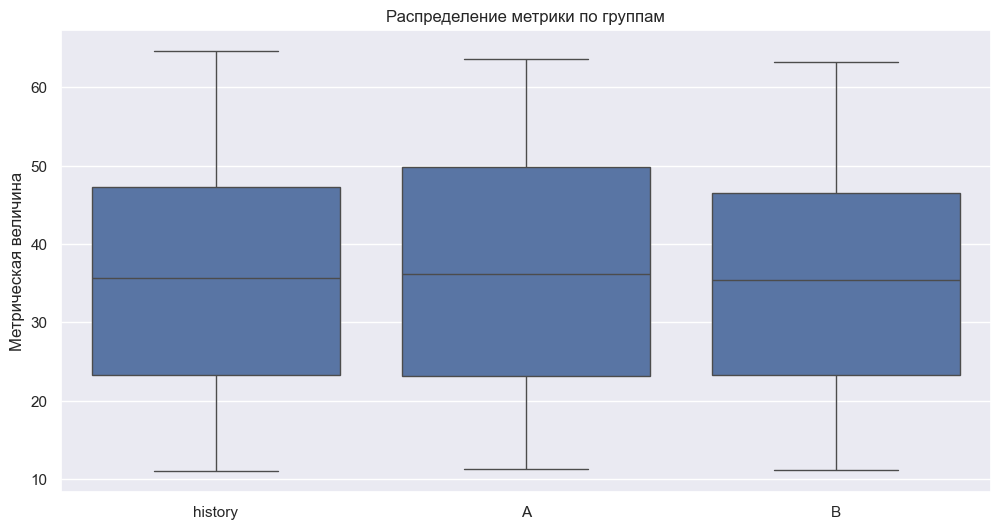

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='groups', y='means', data=df)
plt.title('Распределение метрики по группам')
plt.xlabel('')
plt.ylabel('Метрическая величина')
plt.show()

## Метод CUPED

In [ ]:
# сбросим индексы, чтобы колонка strata стала "активной"
data.reset_index(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   strata   50000 non-null  int64  
 1   group    50000 non-null  object 
 2   metrica  50000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
data.head()

,strata,group,metrica
0,11,history,42.631346
1,6,history,14.844453
2,4,history,2.362768
3,37,history,79.494017
4,18,history,-22.627788


In [ ]:
# Добавляем ковариату в датасет
# (поскольку данных до теста у нас нет, в качестве ковариаты использую среднее значение метрики по страте)
mean_by_strata = data.groupby('strata')['metrica'].mean().reset_index()
mean_by_strata.rename(columns={'metrica': 'mean_metrica_by_strata'}, inplace=True)
data = pd.merge(data, mean_by_strata, on='strata', how='left')

data['centralized_metrica'] = data['metrica'] - data['mean_metrica_by_strata']

data.head()

,strata,group,metrica,mean_metrica_by_strata,centralized_metrica
0,11,history,42.631346,22.419721,20.211625
1,6,history,14.844453,16.955399,-2.110947
2,4,history,2.362768,15.617281,-13.254513
3,37,history,79.494017,48.759656,30.734360
4,18,history,-22.627788,28.821863,-51.449650


In [ ]:
correlation = data['centralized_metrica'].corr(data['metrica'])
print(f'Коэффициент корреляции: {correlation}')
# centralized_metrica - и есть наша ковариата - независимый признак, который коррелирует с основной метрикой

Коэффициент корреляции: 0.9069150222423064


In [ ]:
# Рассчитываем theta

covariance = np.cov(data['metrica'], data['centralized_metrica'])
variance = np.var(data['centralized_metrica'])

theta = covariance[0][1] / variance
print(theta)

1.0000200004000157


In [ ]:
# Рассчитываем cuped-метрику

data['cuped_metrica'] = data['metrica'] - (data['centralized_metrica'] - np.mean(data['centralized_metrica'])) * theta
data.tail()

,strata,group,metrica,mean_metrica_by_strata,centralized_metrica,cuped_metrica
49995,47,A,3.089373,59.203579,-56.114206,59.204701
49996,44,A,54.028849,55.460096,-1.431247,55.460124
49997,49,A,119.874609,60.982261,58.892348,60.981084
49998,18,A,50.340589,28.821863,21.518726,28.821432
49999,41,B,81.676537,49.544883,32.131654,49.544240


In [ ]:
h_metrica = data[data['group'] == 'history']['metrica']
h_cuped_metrica = data[data['group'] == 'history']['cuped_metrica']
a_metrica = data[data['group'] == 'A']['metrica']
a_cuped_metrica = data[data['group'] == 'A']['cuped_metrica']
b_metrica = data[data['group'] == 'B']['metrica']
b_cuped_metrica = data[data['group'] == 'B']['cuped_metrica']

In [ ]:
# Сравнение дисперсий
print(f'Группа history. Дисперсия до cuped: {h_metrica.var()}')
print(f'Группа history. Дисперсия после cuped: {h_cuped_metrica.var()}')

Группа history. Дисперсия до cuped: 1180.0563112167824
Группа history. Дисперсия после cuped: 203.3364661493701


In [ ]:
# Сравнение дисперсий
print(f'Группа А. Дисперсия до cuped: {a_metrica.var()}')
print(f'Группа А. Дисперсия после cuped: {a_cuped_metrica.var()}')

Группа А. Дисперсия до cuped: 1184.4968368454354
Группа А. Дисперсия после cuped: 209.41926940273643


In [ ]:
# Сравнение дисперсий
print(f'Группа В. Дисперсия до cuped: {b_metrica.var()}')
print(f'Группа В. Дисперсия после cuped: {b_cuped_metrica.var()}')

Группа В. Дисперсия до cuped: 1165.657874518115
Группа В. Дисперсия после cuped: 209.79712678310634


In [ ]:
print(sps.shapiro(h_cuped_metrica))
print(sps.shapiro(a_cuped_metrica))
print(sps.shapiro(b_cuped_metrica))

ShapiroResult(statistic=0.955457407186092, pvalue=4.033908491691653e-42)
ShapiroResult(statistic=0.9524376743526944, pvalue=1.1854115576141254e-62)
ShapiroResult(statistic=0.9514993157969426, pvalue=4.8254905693320616e-63)


C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7143.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21427.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\chiffka\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21430.
  res = hypotest_fun_out(*samples, **kwds)


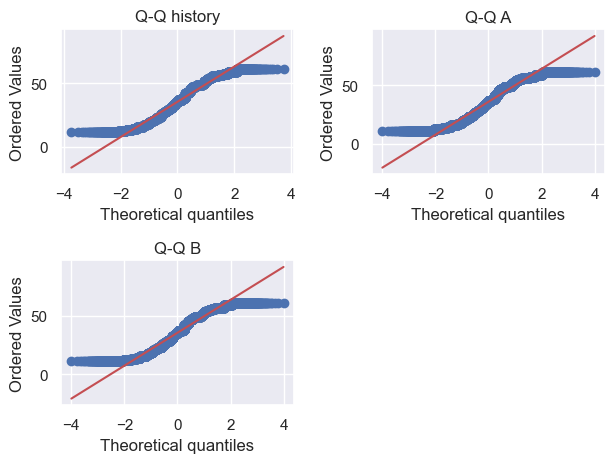

In [ ]:
# Поскольку значений в выборках слишком много, воспользуемся визуальными методами, чтобы подтвердить тест Шапиро-Уилка
cols = {'history':h_cuped_metrica, 'A':a_cuped_metrica, 'B':b_cuped_metrica}
for idx, (name, col) in enumerate(cols.items()):
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name}')

plt.tight_layout()
plt.show()

# Отсутствие нормального распределения подтверждено

In [ ]:
kr_statistic, kr_p_value = sps.kruskal(h, a, b)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние отличаются')

Статистик 5.035198479628889, p_value 0.0806530030261136
Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено


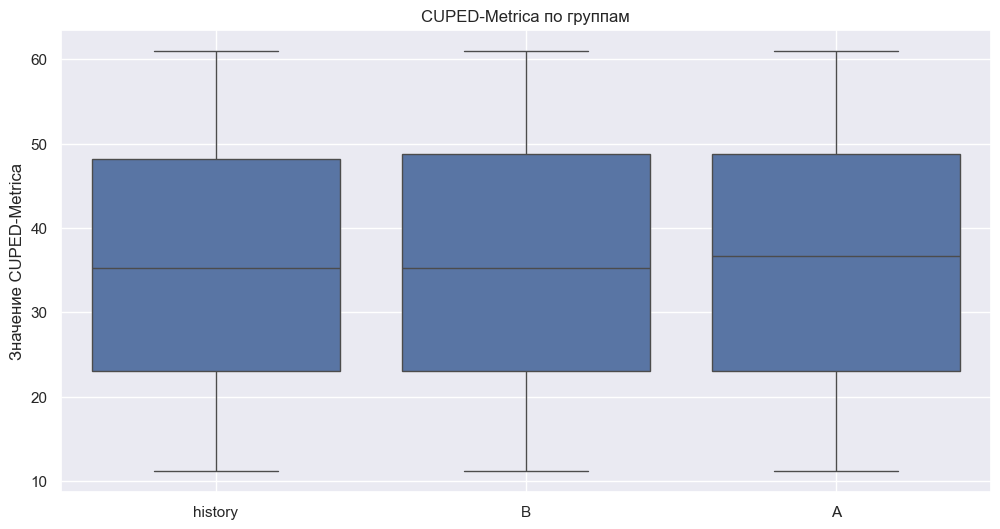

           count       mean        std        min        25%        50%  \
group                                                                     
A        21427.0  35.822784  14.471326  11.219243  23.041743  36.676887   
B        21430.0  35.554020  14.484375  11.219200  23.041550  35.302129   
history   7143.0  35.452635  14.259610  11.219256  23.041594  35.302187   

               75%        max  
group                          
A        48.760029  60.985306  
B        48.759672  60.985683  
history  48.119292  60.984661  


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='group', y='cuped_metrica', data=data)
plt.title('CUPED-Metrica по группам')
plt.xlabel('')
plt.ylabel('Значение CUPED-Metrica')
plt.grid(True)
plt.show()

# 2. Вычисляем основные статистики для strata по каждой группе
strata_stats = data.groupby('group')['cuped_metrica'].describe()
print(strata_stats)

In [ ]:
sps.f_oneway(h_cuped_metrica, a_cuped_metrica, b_cuped_metrica)

F_onewayResult(statistic=2.669302887057623, pvalue=0.06931039492781586)